In [1]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']= (16,10)

In [2]:

%%latex
$$ h (x) = Mx + C\\$$

<IPython.core.display.Latex object>

h(x) is the hypothesis function. corresponding to the predicted value

# Cost Function 

In [3]:
%%latex
$$J(M,C)=\frac{1}{2m}\sum_{i=1}^{m}\left({h(x)}^{(i)}-y^{(i)}\right)^2 \\
M- number\quad of\quad training \quad\ examples \\
y - Target\\
C - constant 
$$


<IPython.core.display.Latex object>

## Gradient Descent Update

In [4]:
%%latex
$$
M:= M-\alpha\frac{\partial}{\partial M}{J}\\
C:= C-\alpha\frac{\partial}{\partial C}{J}
$$

<IPython.core.display.Latex object>

In [5]:
%%latex
$$
\alpha\frac{\partial}{\partial M}{J} = \frac{1}{m}\sum_{i=1}^{m}\big({h(x)}-y\big) * x\\
\alpha\frac{\partial}{\partial C}{J} = \frac{1}{m}\sum_{i=1}^{m}\big({h(x)}-y\big)\\
$$

<IPython.core.display.Latex object>

## Training Data

In [6]:
def training_data():
    X, y = [],[]
    with open('../../data/train.csv','r') as data:
        all_lines = data.readlines()[1:]
        for line in all_lines:
            X_y = line.split(',')
            X.append(X_y[4].strip())
            y.append(X_y[-1].strip())
    return np.array(X,dtype=np.float64) ,np.array(y,dtype=np.float64)

In [7]:
def predictions(c,m,x):
    return c + (m*x)

In [8]:
def mean_squared_error(target,model_prediction):
    return ((1./2*len(target))*sum((target-model_prediction)**2))

In [9]:
def loss_wrt_c(target,model_predictions):
    return sum(model_predictions-target)*(1./len(target))

In [10]:
def loss_wrt_m(target,model_predictions,x_):
    return sum((model_predictions-target)*x_)*(1./len(target))
    

In [11]:
def min_max(x_):
    return (x_-min(x_))/(max(x_)-min(x_))

In [50]:
x,y = training_data()


In [51]:
 x, y = min_max(np.c_[x]), np.c_[y]

In [54]:
m = 1
c = 1
learning_rate = 0.1
iteration = 0
epsilon = 1e-5
errors = []

In [55]:
for _ in range(30000):
    yhat = predictions(c,m,X)
    error = mean_squared_error(y,yhat)
    derivative_c = loss_wrt_c(y,yhat)
    derivative_m = loss_wrt_m(y,yhat,X)
    c = c - (learning_rate*derivative_c)
    m = m - (learning_rate*derivative_m)
    errors.append(error)
    if iteration%2000 ==0:
        print('ITER: ',iteration,'LOSS: ',error[0],m[0],c[0])
    iteration+=1

ITER:  0 LOSS:  4.16076471755e+16 878.130689848 18093.015281
ITER:  2000 LOSS:  6.44342595537e+15 163372.220784 173909.859874
ITER:  4000 LOSS:  6.33339254829e+15 264082.551436 169561.782627
ITER:  6000 LOSS:  6.28722464673e+15 329317.72304 166745.313219
ITER:  8000 LOSS:  6.26785348309e+15 371573.841023 164920.943624
ITER:  10000 LOSS:  6.25972571535e+15 398945.264491 163739.207224
ITER:  12000 LOSS:  6.25631546031e+15 416675.11897 162973.736826
ITER:  14000 LOSS:  6.25488458288e+15 428159.641878 162477.902958
ITER:  16000 LOSS:  6.25428421423e+15 435598.747855 162156.7263
ITER:  18000 LOSS:  6.25403231109e+15 440417.432809 161948.683945
ITER:  20000 LOSS:  6.25392661737e+15 443538.738616 161813.924395
ITER:  22000 LOSS:  6.25388227032e+15 445560.566154 161726.633824
ITER:  24000 LOSS:  6.25386366316e+15 446870.206045 161670.091309
ITER:  26000 LOSS:  6.25385585594e+15 447718.525998 161633.465864
ITER:  28000 LOSS:  6.25385258019e+15 448268.025711 161609.741712


In [56]:
c

array([ 161594.38051547])

In [57]:
m

array([ 448623.82231784])

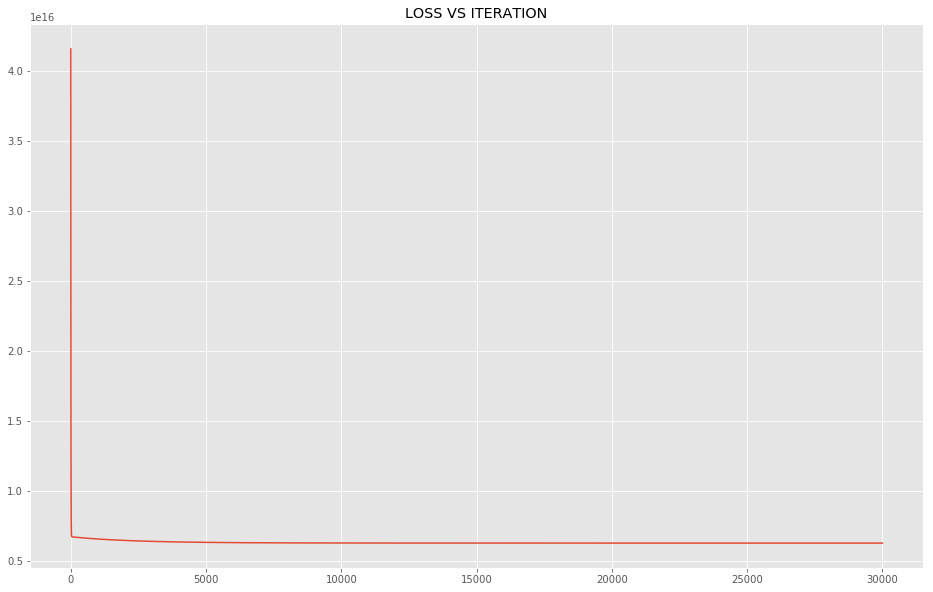

In [62]:
plt.plot(list(range(30000)),np.array(errors))
plt.title('LOSS VS ITERATION')
plt.show()

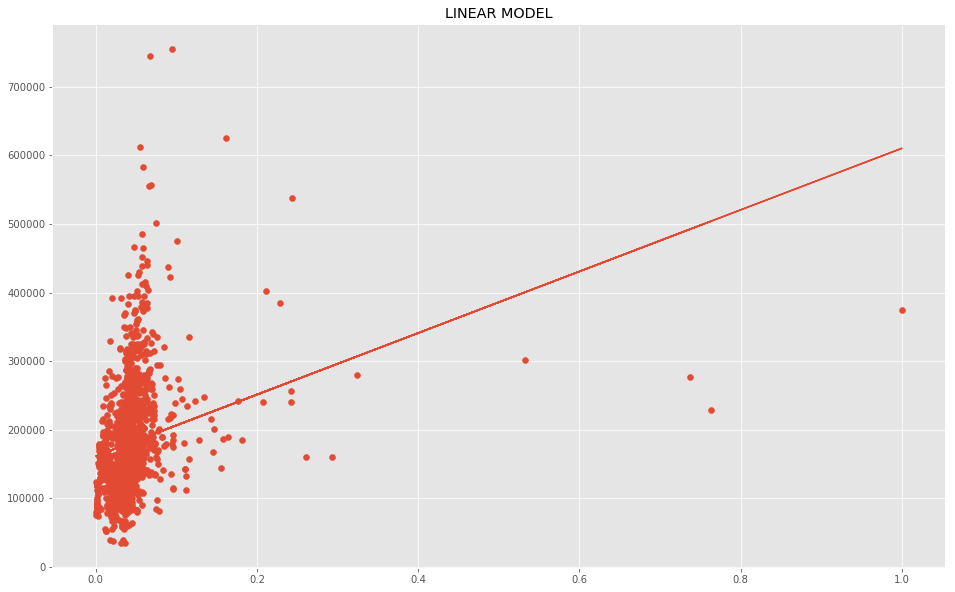

In [59]:
plt.scatter(x,y)
plt.plot(x,predictions(c,m,x))
plt.title('LINEAR MODEL')
plt.show()